In [2]:
%pip install yfinance
%pip install pandas
%pip install numpy
%pip install talib



Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement talib (from versions: none)
ERROR: No matching distribution found for talib


In [3]:
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [30]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
import yfinance as yf
import pandas as pd
import numpy as np
import talib as ta
import matplotlib.pyplot as plt


In [45]:
df = yf.download("TSLA", start="2015-01-01",end="2025-02-08",interval="1d")
print(df)

[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker            TSLA        TSLA        TSLA        TSLA      TSLA
Date                                                                
2015-01-02   14.620667   14.883333   14.217333   14.858000  71466000
2015-01-05   14.006000   14.433333   13.810667   14.303333  80527500
2015-01-06   14.085333   14.280000   13.614000   14.004000  93928500
2015-01-07   14.063333   14.318667   13.985333   14.223333  44526000
2015-01-08   14.041333   14.253333   14.000667   14.187333  51637500
...                ...         ...         ...         ...       ...
2025-02-03  383.679993  389.170013  374.359985  386.679993  93732100
2025-02-04  392.209991  394.000000  381.399994  382.630005  57072200
2025-02-05  378.170013  388.390015  375.529999  387.510010  57223300
2025-02-06  374.320007  375.399994  363.179993  373.029999  77918200
2025-02-07  361.619995  380.549988  360.339996  370.190002  69494500

[2541 rows x 5 columns]


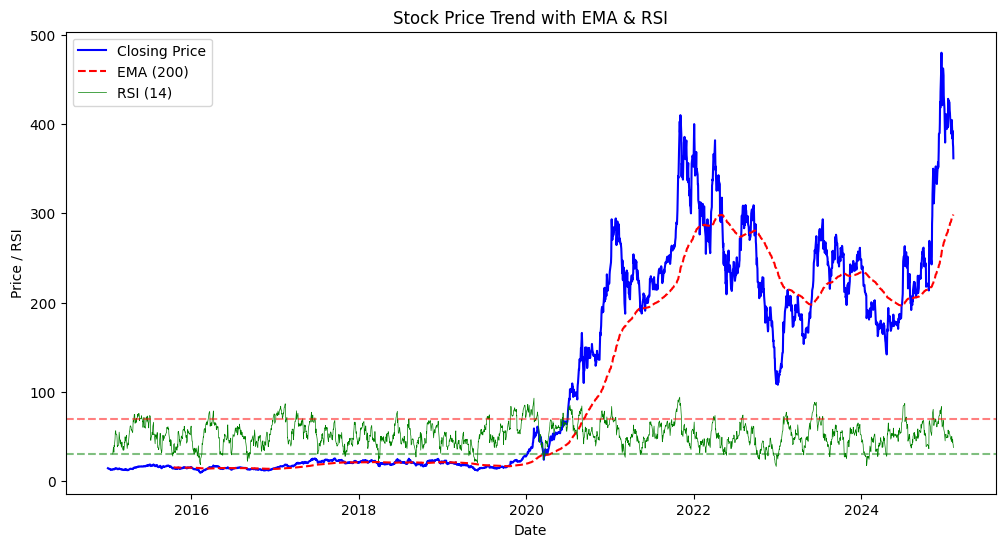

In [52]:
df['RSI'] = ta.RSI(df['Close'].values.ravel(), timeperiod=14)
df['EMA'] = ta.EMA(df['Close'].values.ravel(), timeperiod=200)
df.dropna()


plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'], label = "Closing Price", color = 'blue')
plt.plot(df.index, df['EMA'], label="EMA (200)", color='red', linestyle='dashed')
plt.plot(df.index, df['RSI'], label="RSI (14)", color='green', linewidth=0.5)

plt.axhline(70, linestyle='--', color='red', alpha=0.5) 
plt.axhline(30, linestyle='--', color='green', alpha=0.5)

plt.xlabel("Date")
plt.ylabel("Price / RSI")
plt.title("Stock Price Trend with EMA & RSI")
plt.legend()
plt.show()

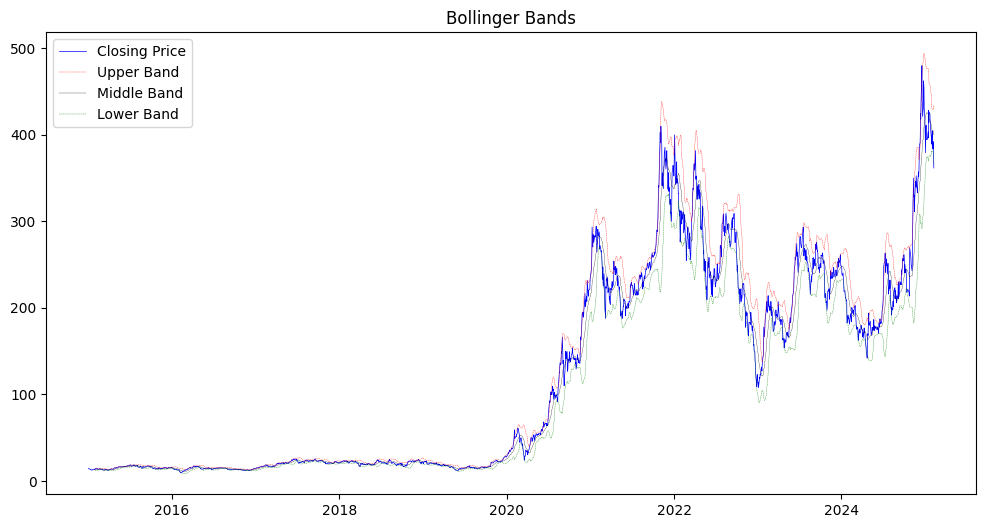

In [47]:
df['Upper_BB'], df['Middle_BB'], df['Lower_BB'] = ta.BBANDS(df['Close'].values.ravel(), timeperiod=20)

plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'], label="Closing Price", color='blue', linewidth=0.5)
plt.plot(df.index, df['Upper_BB'], label="Upper Band", color='red', linestyle='dashed', linewidth=0.25)
plt.plot(df.index, df['Middle_BB'], label="Middle Band", color='black', linewidth=0.2)
plt.plot(df.index, df['Lower_BB'], label="Lower Band", color='green', linestyle='dashed', linewidth=0.25)
plt.title("Bollinger Bands")
plt.legend()
plt.show()


In [48]:
df['Buy_Signal'] = (df['RSI'].values.ravel() < 30) & (df['Close'].values.ravel() < df['Lower_BB'].values.ravel())
df['Sell_Signal'] = (df['RSI'].values.ravel() > 70) & (df['Close'].values.ravel() > df['Upper_BB'].values.ravel())

df.loc[(df['Buy_Signal']==True)]


Price,Close,High,Low,Open,Volume,RSI,EMA,Upper_BB,Middle_BB,Lower_BB,Buy_Signal,Sell_Signal
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,,,,,,,
Date,,,,,,,,,,,,
2015-10-12,14.372000,14.866667,14.351333,14.866000,57544500,28.148147,NaN,18.441382,16.527433,14.613484,True,False
2016-02-03,11.565333,12.262667,11.345333,12.239333,118971000,26.664591,14.885053,14.761674,13.310133,11.858593,True,False
2016-02-05,10.840000,11.533333,10.516000,11.420000,141564000,23.746719,14.813315,14.683293,12.987600,11.291907,True,False
2016-02-08,9.866000,10.476667,9.733333,10.473333,139695000,19.543462,14.764088,14.878737,12.777567,10.676396,True,False
2016-02-09,9.883333,10.652667,9.403333,9.488000,129774000,19.815465,14.715523,14.966256,12.578900,10.191544,True,False
2016-02-10,9.578000,10.331333,9.449333,10.033333,156097500,18.621193,14.664404,14.985145,12.357900,9.730655,True,False
2016-06-24,12.876667,13.008000,12.648667,12.670000,105397500,29.552066,14.675650,15.917765,14.499733,13.081702,True,False
2016-09-01,13.384667,14.073333,13.366667,13.934000,119146500,24.174180,14.717086,15.679887,14.776833,13.873780,True,False


In [44]:
%pip install openpyxl

df.to_excel("TSLA_stock_data.xlsx")


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



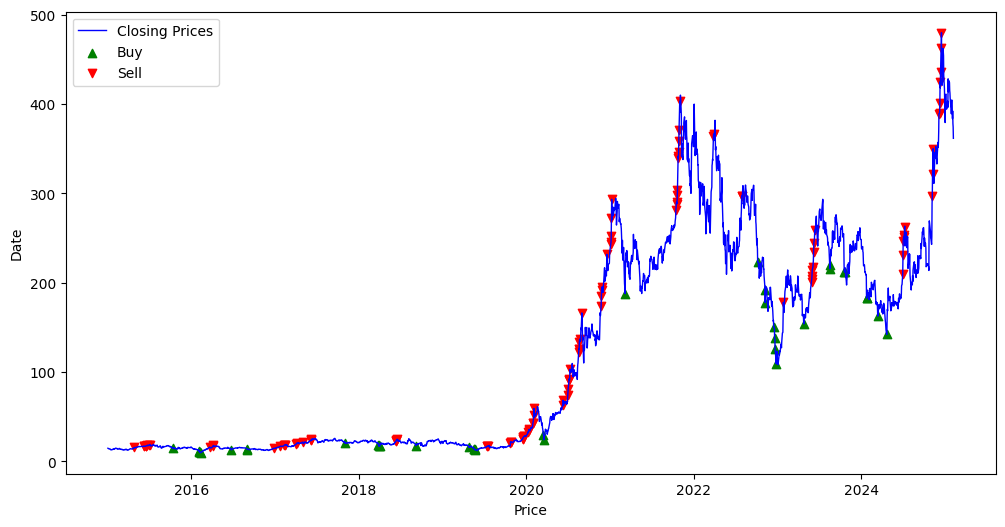

In [49]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df.Close.values.ravel(), label="Closing Prices", color="blue", linewidth=1)

plt.scatter(df.index[df['Buy_Signal']], df['Close'][df['Buy_Signal']], label="Buy", marker="^", color="green", alpha=1)
plt.scatter(df.index[df['Sell_Signal']], df['Close'][df['Sell_Signal']], label="Sell", marker="v", color="red", alpha=1)

plt.xlabel("Price")
plt.ylabel("Date")

plt.legend()
plt.show()


In [50]:
initial_balance = 10000
cash = initial_balance
shares = 0
trades = []

# Loop through each row in the dataframe
for i in range(len(df)):
    price = float(df['Close'].iloc[i])
    
    # Buy signal
    if df['Buy_Signal'].iloc[i] and cash > 0:
        shares = cash / price
        trades.append(f"Buy: {shares:.2f} shares at ${price:.2f}")
        cash = 0
    
    # Sell signal
    elif df['Sell_Signal'].iloc[i] and shares > 0:
        cash = shares * price
        trades.append(f"Sell: {shares:.2f} shares at ${price:.2f}")
        shares = 0

# Calculate final value
final_price = float(df['Close'].iloc[-1])
final_value = cash + (shares * final_price)
total_return = ((final_value / initial_balance) - 1) * 100

# Print results
print(f"Initial Balance: ${initial_balance:,.2f}")
print(f"Final Balance: ${final_value:,.2f}")
print(f"Return: {total_return:.2f}%")
print(f"\nNumber of Trades: {len(trades)}")
print(trades)

C:\Users\iamma\AppData\Local\Temp\ipykernel_11928\2547382905.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(df['Close'].iloc[i])


Initial Balance: $10,000.00
Final Balance: $44,242.07
Return: 342.42%

Number of Trades: 18
['Buy: 695.80 shares at $14.37', 'Sell: 695.80 shares at $15.89', 'Buy: 858.52 shares at $12.88', 'Sell: 858.52 shares at $14.64', 'Buy: 629.79 shares at $19.95', 'Sell: 629.79 shares at $22.85', 'Buy: 820.06 shares at $17.55', 'Sell: 820.06 shares at $16.90', 'Buy: 467.08 shares at $29.67', 'Sell: 467.08 shares at $63.33', 'Buy: 157.62 shares at $187.67', 'Sell: 157.62 shares at $281.01', 'Buy: 198.56 shares at $223.07', 'Sell: 198.56 shares at $177.90', 'Buy: 229.74 shares at $153.75', 'Sell: 229.74 shares at $201.16', 'Buy: 210.82 shares at $219.22', 'Sell: 210.82 shares at $209.86']


C:\Users\iamma\AppData\Local\Temp\ipykernel_11928\2547382905.py:23: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  final_price = float(df['Close'].iloc[-1])
